In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch_model import model 

In [3]:
batch_size = 1
num_classes = 8
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
class TestDataset(Dataset):
    def __init__(self):
        self.x = torch.from_numpy(np.load('process_data/Training_Data/test_x.npy').astype(np.float32))
        self.y = torch.from_numpy(np.load('process_data/Training_Data/test_y.npy').reshape(-1,1).astype(np.float32))
        self.n_samples = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

testDataset = TestDataset()
test_loader = DataLoader(dataset=testDataset,batch_size=batch_size,shuffle=True)

In [6]:
print(f"Number of samples: {len(test_loader)}")

Number of samples: 15989


In [7]:
model = model.to(device)
model.load_state_dict(torch.load('model.pt'))
print(model)
# Set model to evaluation model
model.eval() 

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (1): ResBlock(
    (conv1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, mome

/var/folders/9d/6rf90dw54l9gy3y3ycktwjg00000gn/T/ipykernel_9110/3050824849.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pt'))


Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (1): ResBlock(
    (conv1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (2): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, mome

In [8]:
# Dictionary genres
dict_genres = {
    "Hip-Hop": 0,
    "International": 1,
    "Electronic": 2,
    "Folk" : 3,
    "Experimental": 4,
    "Rock": 5,
    "Pop": 6,
    "Instrumental": 7  
}

In [9]:
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs/255
        inputs = (inputs[:,None,:,:]).to(device)
        labels = F.one_hot(targets.type(torch.LongTensor),num_classes).reshape(-1,num_classes).to(device)
        out = model(inputs)
        _, predicted = torch.max(out.data, 1)
        y_true.append((torch.max(labels,1)[1]).tolist())
        y_pred.append(predicted.tolist())

In [10]:
y_true[:10]

[[1], [1], [3], [5], [7], [5], [1], [0], [1], [5]]

In [11]:
y_pred[:10]

[[1], [1], [3], [5], [7], [6], [1], [0], [1], [5]]

In [12]:
from sklearn.metrics import classification_report
target_names = dict_genres.keys()
print(classification_report(y_true, y_pred, target_names=target_names))

               precision    recall  f1-score   support

      Hip-Hop       0.90      0.92      0.91      1971
International       0.91      0.91      0.91      2049
   Electronic       0.88      0.89      0.89      1982
         Folk       0.86      0.86      0.86      1961
 Experimental       0.87      0.84      0.86      2001
         Rock       0.89      0.88      0.88      2006
          Pop       0.81      0.78      0.80      2007
 Instrumental       0.85      0.88      0.87      2012

     accuracy                           0.87     15989
    macro avg       0.87      0.87      0.87     15989
 weighted avg       0.87      0.87      0.87     15989



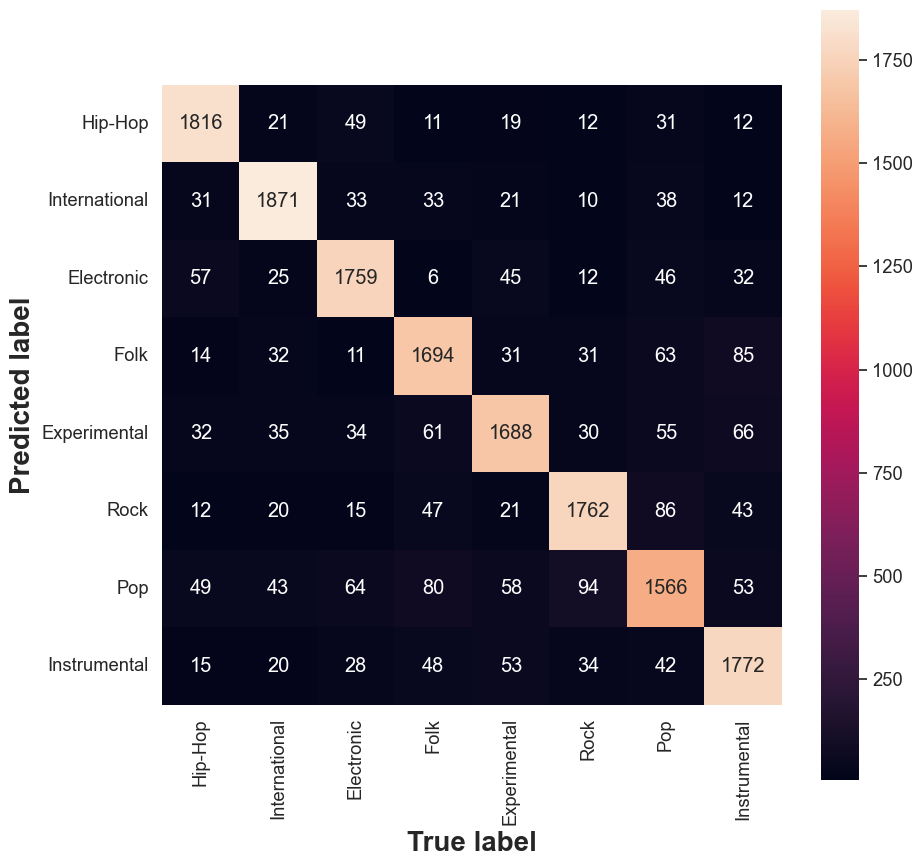

In [13]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=dict_genres.keys(),
            yticklabels=dict_genres.keys())
plt.xlabel('True label', fontsize=20, fontweight='bold')
plt.ylabel('Predicted label', fontsize=20, fontweight='bold');

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy score: {:.4f} % ".format(accuracy_score(y_true, y_pred)*100))

Accuracy score: 87.1099 % 
